Cloning into 'Torch2PC'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 37 (delta 10), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (37/37), done.
Running TorchSeq2PC.py
Mounted at /content/gdrive/



Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified
Number of data points in training set =  50000
Number of data points in test set= 10000
Size of one training input (X)= (32, 32, 3)


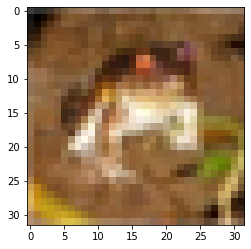

In [ ]:


import torch # We no longer import as tch
import torch.nn as nn
import numpy as np
import torchvision # Contains data sets and functions for image processing
import torchvision.transforms as transforms # Contains MNIST, other image datasets, and image processing functions
import matplotlib.pyplot as plt
from time import time as tm
import torch.nn.functional as F 
from copy import deepcopy
import seaborn as sns

# Import TorchSeq2PC 
!git clone https://github.com/RobertRosenbaum/Torch2PC.git
from Torch2PC import TorchSeq2PC as T2PC

SaveFigures=False

if SaveFigures:
  from google.colab import drive
  drive.mount("/content/gdrive/")
  

torch.manual_seed(0)

# Load training and testing data from MNIST dataset
# These lines return data structures that contain
# the training and testing data 
from torchvision.datasets import CIFAR10

train_dataset = CIFAR10('./', 
      train=True, 
      transform=transforms.ToTensor(),  
      download=True)

test_dataset = CIFAR10('./', 
      train=False, 
      transform=transforms.ToTensor(),  
      download=True)

#train_dataset.data=train_dataset.data/255.0
#test_dataset.data=test_dataset.data/255.0

# Print the size of the two data sets
m = len(train_dataset)
mtest = len(test_dataset)
print("Number of data points in training set = ",m)
print("Number of data points in test set=",mtest)

# # train_dataset.data contains all the MNIST images (X) 
# # train_dataset.targets contains all the labels (Y)
# print("Size of training inputs (X)=",train_dataset.data)
# print("Size of training labels (Y)=",train_dataset.targets.shape)

print("Size of one training input (X)=",train_dataset.data[0].shape)

plt.figure()
plt.imshow(train_dataset.data[0])

In [ ]:
batch_size = 256      # Batch size to use with training data
test_batch_size = 256 # Batch size to use for test data

# Data loader. These make it easy to iterate through batches of data.
# Shuffle=True means that the data will be randomly shuffled on every epoch
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=True,
                                          drop_last=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=test_batch_size,
                                          shuffle=True,
                                          drop_last=True)


steps_per_epoch = len(train_loader) # = mini batch size = m'
print("steps per epoch (mini batch size)=",steps_per_epoch)


steps per epoch (mini batch size)= 195


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('device = ',device)


model =nn.Sequential(
    
    nn.Sequential(
    nn.Conv2d(3,64,kernel_size=3,padding=1),    
    nn.ReLU()
    ),

    nn.Sequential(
    nn.Conv2d(64,128,kernel_size=3,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2)
    ),

    nn.Sequential(
    nn.Conv2d(128,256,kernel_size=3,padding=1),
    #nn.BatchNorm2d(256),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Flatten()
    ),

    nn.Sequential(
    nn.Linear(256*8*8,256),    
    #nn.BatchNorm1d(256),
    nn.ReLU(),
    #nn.Dropout(.1)
    ),
    
    nn.Sequential(
    nn.Linear(256,256),
    #nn.BatchNorm1d(256),
    nn.ReLU(),
    #nn.Dropout(.1)
    ),
    
    nn.Sequential(
    nn.Linear(256,10)
    )
    
).to(device)

LossFun = nn.CrossEntropyLoss()

# Compute one output and one loss to make sure
# things are working
with torch.no_grad():
  TrainingIterator=iter(train_loader)
  X,Y=next(TrainingIterator)  
  X=X.to(device)
  Y=Y.to(device)
  Yhat=model(X).to(device)
  print('output shape = ',Yhat.shape)
  print('loss on initial model = ',LossFun(Yhat,Y).item())


NumParams=sum(p.numel() for p in model.parameters() if p.requires_grad)
print('Number of trainable parameters in model =',NumParams)

LearningRate=.01
num_epochs=5
ComputeTrainingMetrics=True
WhichOptimizer=torch.optim.Adam
PrintEvery=50
total_num_steps  = num_epochs*steps_per_epoch

device =  cuda
output shape =  torch.Size([256, 10])
loss on initial model =  2.300240993499756
Number of trainable parameters in model = 4633738


k = 0 i = 0 L = 2.3012022972106934
k = 0 i = 50 L = 2.0504415035247803
k = 0 i = 100 L = 1.7600167989730835
k = 0 i = 150 L = 1.546165943145752
k = 1 i = 0 L = 1.5525022745132446
k = 1 i = 50 L = 1.492508053779602
k = 1 i = 100 L = 1.3699209690093994
k = 1 i = 150 L = 1.387919306755066
k = 2 i = 0 L = 1.2450546026229858
k = 2 i = 50 L = 1.2783905267715454
k = 2 i = 100 L = 1.2346314191818237
k = 2 i = 150 L = 1.0688450336456299
k = 3 i = 0 L = 1.0313559770584106
k = 3 i = 50 L = 1.0621179342269897
k = 3 i = 100 L = 1.0903618335723877
k = 3 i = 150 L = 1.093787431716919
k = 4 i = 0 L = 0.9705573320388794
k = 4 i = 50 L = 0.9366838335990906
k = 4 i = 100 L = 0.880325198173523
k = 4 i = 150 L = 1.0456428527832031
Training time =  428.70163011550903 sec


Text(0, 0.5, 'rel err of dtheta')

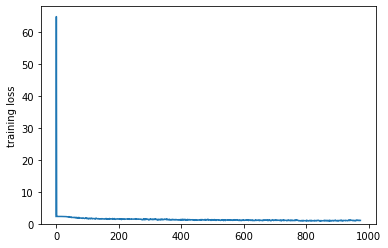

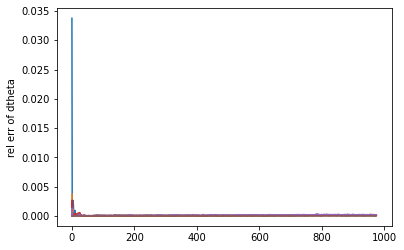

In [ ]:
torch.manual_seed(0)

modelPC=deepcopy(model)


optimizerPC = WhichOptimizer(modelPC.parameters(), lr=LearningRate)


jj=0
LossesToPlotPC=np.zeros(total_num_steps)
TestLossesToPlotPC=np.zeros(total_num_steps)
AccuraciesToPlotPC=np.zeros(total_num_steps)
TestAccuraciesToPlotPC=np.zeros(total_num_steps)

GradsRelDiff0=np.zeros([total_num_steps,len(model)])
GradsCosSim0=np.zeros([total_num_steps,len(model)])
GradsAngle0=np.zeros([total_num_steps,len(model)])

def RelDiff(x,y):
  return np.linalg.norm(x-y)/np.linalg.norm(y)

def corr2(x,y):
  c=np.corrcoef(x,y)
  return c[0,1]

CosSim = nn.CosineSimilarity(dim=0, eps=1e-8)

eta=1
n=len(model)

j=0     # Counter to keep track of iterations
t1=tm() # Start the timer

for k in range(num_epochs):

  # Re-initializes the training iterator (shuffles data for one epoch)
  TrainingIterator=iter(train_loader)
  
  for i in range(steps_per_epoch): # For each batch

    # Get one batch of training data, reshape it
    # and send it to the current device        
    X,Y=next(TrainingIterator)  
    X=X.to(device)
    Y=Y.to(device)

    
    vhat,Loss,_,_,_=T2PC.PCInfer(modelPC,LossFun,X,Y,"FixedPred",eta,n)
    Yhat=vhat[-1]

    if ComputeTrainingMetrics:
      modelBP=deepcopy(modelPC)   # Copy the model
      YhatBP = modelBP(X)         # Forward pass
      LossBP = LossFun(YhatBP, Y)        
      LossBP.backward()       # Compute gradients
      for layer in range(len(model)):
        gradsPC=modelPC[layer][0].weight.grad.cpu().detach().numpy()      
        gradsBP=modelBP[layer][0].weight.grad.cpu().detach().numpy()
        GradsRelDiff0[jj,layer]=RelDiff(gradsPC,gradsBP)
        GradsCosSim0[jj,layer]=CosSim(torch.tensor(gradsPC.flatten()),torch.tensor(gradsBP.flatten())).item()
        GradsAngle0[jj,layer]=torch.acos(torch.tensor(GradsCosSim0[jj,layer])).item()
      modelBP.zero_grad()


    # Update parameters    
    optimizerPC.step() 

    # Zero-out gradients     
    modelPC.zero_grad()
    optimizerPC.zero_grad()

    # Print loss, store loss, compute test loss
    with torch.no_grad():
      if(i%PrintEvery==0):
        print('k =',k,'i =',i,'L =',Loss.item())
      LossesToPlotPC[jj]=Loss.item() 
      if ComputeTrainingMetrics:    
        modelPC.eval()
        #Yhat=modelPC(X)        
        AccuraciesToPlotPC[jj]=(torch.sum(Y==torch.argmax(Yhat,axis=1))/test_batch_size).item()         
        TestingIterator=iter(test_loader)     
        Xtest,Ytest=next(TestingIterator)
        Xtest=Xtest.to(device)
        Ytest=Ytest.to(device)        
        YhatTest=modelPC(Xtest)
        TestLossesToPlotPC[jj]=LossFun(YhatTest,Ytest).item()                   
        TestAccuraciesToPlotPC[jj]=(torch.sum(Ytest==torch.argmax(YhatTest,axis=1))/test_batch_size).item()
        modelPC.train()
      jj+=1

tTrain=tm()-t1
print('Training time = ',tTrain,'sec')


plt.figure()
plt.plot(LossesToPlotPC)
plt.ylim(bottom=0)  
plt.ylabel('training loss')

plt.figure()
plt.plot(GradsRelDiff0)
plt.ylabel('rel err of dtheta')



k = 0 i = 0 L = 2.3012022972106934
k = 0 i = 50 L = 2.059783458709717
k = 0 i = 100 L = 1.7072118520736694
k = 0 i = 150 L = 1.5068793296813965
k = 1 i = 0 L = 1.4781134128570557
k = 1 i = 50 L = 1.411075472831726
k = 1 i = 100 L = 1.3437018394470215
k = 1 i = 150 L = 1.5296721458435059
k = 2 i = 0 L = 1.3694543838500977
k = 2 i = 50 L = 1.268241286277771
k = 2 i = 100 L = 1.2668821811676025
k = 2 i = 150 L = 1.2159676551818848
k = 3 i = 0 L = 1.1265381574630737
k = 3 i = 50 L = 1.1619627475738525
k = 3 i = 100 L = 1.0279111862182617
k = 3 i = 150 L = 1.1686829328536987
k = 4 i = 0 L = 1.0675326585769653
k = 4 i = 50 L = 1.0526725053787231
k = 4 i = 100 L = 1.0117461681365967
k = 4 i = 150 L = 1.0462216138839722
Training time =  96.44561767578125 sec


(0.0, 0.690234375)

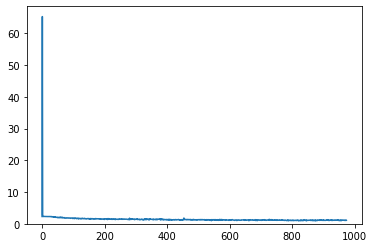

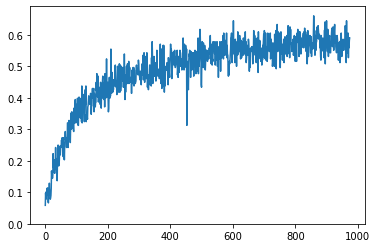

In [ ]:
torch.manual_seed(0)

modelBP=deepcopy(model)

optimizerBP = WhichOptimizer(modelBP.parameters(), lr=LearningRate)

total_num_steps  = num_epochs*steps_per_epoch


jj=0
LossesToPlotBP=np.zeros(total_num_steps)
TestLossesToPlotBP=np.zeros(total_num_steps)
AccuraciesToPlotBP=np.zeros(total_num_steps)
TestAccuraciesToPlotBP=np.zeros(total_num_steps)


DepthPlusOne=len(modelBP)+1 # Number of layers, counting the input as layer 0  

j=0     # Counter to keep track of iterations
t1=tm() # Start the timer
for k in range(num_epochs):

  # Re-initializes the training iterator (shuffles data for one epoch)
  TrainingIterator=iter(train_loader)

  for i in range(steps_per_epoch): # For each batch

    # Get one batch of training data, reshape it
    # and send it to the current device        
    X,Y=next(TrainingIterator)  
    X=X.to(device)
    Y=Y.to(device)


    # vhat,Loss,_,_,_=T2PC.PCInfer(modelBP,LossFun,X,Y,"Exact")
    # Yhat=vhat[-1]
    # optimizerBP.step()

    Yhat = modelBP(X)     # Forward pass
    Loss = LossFun(Yhat, Y)        
    Loss.backward()       # Compute gradients
    optimizerBP.step()      # Update parameters


    # Zero-out gradients 
    modelBP.zero_grad() 
    optimizerBP.zero_grad() 

    with torch.no_grad():
      if(i%PrintEvery==0):
        print('k =',k,'i =',i,'L =',Loss.item())
      LossesToPlotBP[jj]=Loss.item()      
      if ComputeTrainingMetrics:   
        modelBP.eval() 
        AccuraciesToPlotBP[jj]=(torch.sum(Y==torch.argmax(Yhat,axis=1))/test_batch_size).item()
        TestingIterator=iter(test_loader)
        Xtest,Ytest=next(TestingIterator)
        Xtest=Xtest.to(device)
        Ytest=Ytest.to(device)
        YhatTest=modelBP(Xtest)        
        TestLossesToPlotBP[jj]=LossFun(YhatTest,Ytest).item()             
        TestAccuraciesToPlotBP[jj]=(torch.sum(Ytest==torch.argmax(YhatTest,axis=1))/test_batch_size).item()
        modelBP.train()
      jj+=1

tTrainBP=tm()-t1
print('Training time = ',tTrainBP,'sec')

plt.figure()
plt.plot(LossesToPlotBP)
plt.ylim(bottom=0)

plt.figure()
plt.plot(TestAccuraciesToPlotBP)
plt.ylim(bottom=0)

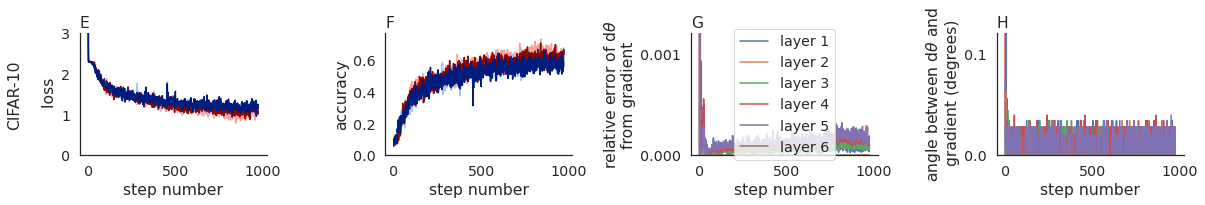

In [ ]:

sns.set(context='notebook',style='white',font_scale=1.3)

fig, axes = plt.subplots(figsize=(17, 3))


plt.subplot(1,4,1)
plt.plot(LossesToPlotPC,color=sns.color_palette('pastel')[3],label='Modified PC (train)')
plt.plot(LossesToPlotBP,color=sns.color_palette('pastel')[0],label='BP (train)')
plt.plot(TestLossesToPlotPC,color=sns.color_palette('dark')[3],label='Modified PC (test)')
plt.plot(TestLossesToPlotBP,color=sns.color_palette('dark')[0],label='BP (test)')
plt.xlabel('step number')
plt.ylabel('CIFAR-10\n\n loss')
sns.despine()
#plt.legend()
plt.ylim(bottom=0,top=3.0)
plt.title('E',loc='left')


plt.subplot(1,4,2)
plt.plot(AccuraciesToPlotPC,color=sns.color_palette('pastel')[3],label='Modified PC (train)')
plt.plot(AccuraciesToPlotBP,color=sns.color_palette('pastel')[0],label='BP (train)')
plt.plot(TestAccuraciesToPlotPC,color=sns.color_palette('dark')[3],label='Modified PC (test)')
plt.plot(TestAccuraciesToPlotBP,color=sns.color_palette('dark')[0],label='BP (test)')
plt.xlabel('step number')
plt.ylabel('accuracy')
sns.despine()
#plt.legend()
plt.ylim(bottom=0)
plt.title('F',loc='left')


plt.subplot(1,4,3)
for layer in range(len(model)):
  plt.plot(GradsRelDiff0[:,layer],label='layer '+str(layer+1))
#plt.plot(GradsRelDiff)
plt.xlabel('step number')
plt.ylabel(r'relative error of d$\theta$'+'\nfrom gradient')
plt.legend(loc='center')
plt.ylim(bottom=0,top=.0012)
plt.yticks([0,.001])
sns.despine()
plt.title('G',loc='left')


plt.subplot(1,4,4)
plt.plot((180/3.14159)*GradsAngle0)
plt.xlabel('step number')
plt.ylabel(r'angle between d$\theta$ and'+'\n gradient (degrees)')
plt.ylim(bottom=0,top=.12)
plt.yticks([0,.1])
sns.despine()
plt.title('H',loc='left')


plt.tight_layout()

if SaveFigures:
  plt.savefig('/content/gdrive/MyDrive/PredictiveCodingANN/Figures/FixedPredPCCIFAReta1.pdf')
